# COGS 109 Final Project Writeup
## Mizuki Kadowaki

# Background

## Research Question
Which descriptive variables about a building can best predict the final sale price of the building after construction?

There are many cases that buildings undergo construction before hitting the market to be sold, in hopes of raising the prices. I wanted to see which factors of a building are the most influential when predicting the final price of a building. This way, a building owner can get a rough idea of how much a building will sell for and whether the construction price would be worth it. 

I hopothesize that the price of the building will be the most influential variable in a univariate analysis. Adding different factors such as the estimate construction cost or size of the building will improve the performance of the model. 

## Dataset Decription: 
Dataset - UJIIndoorLoc Data Set (UCI database)
https://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc#
- Number of instances: 21048
- Number of attributes: 529

This dataset describes the construction process for different buildings. These include variables about the location of the building, as well as the physical descriptive variables of the construction project itself. I would like to use some of these variables to predict the financial values (labels) 

The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint. Other analyses previously done on this dataset mainly focus on WIFI, GPS signals and how the longitude and latitude of the building can be predicted by the Wifi Fingerprint of a building. I will be focusing on the construction of the buildings (only physical and financial variables) 

### Project Physical and Financial Variables
- Project Locality defined in terms of zip codes
- Total floor area of the building 
- Lot area
- Preliminary estimated construction cost based on the prices at the beginning of the project
- Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year (1383)
- Duration of construction
- Price of the unit at the beginning of the project per m^2
- Actual sales prices (output label)
- Actual Construction costs (output label) 

In order to answer my question, I will be using Actual sales prices as my output (Y label). 
I want my model to be useful for the decision making process for building owners on whether to start construction or not. Because of this, I will only be inluding variable values that can be determined before construction begins.

## Setup

In [444]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [445]:
# Import Datasets
xls = pd.ExcelFile("Residential-Building-Data-Set.xlsx")
df1 = pd.read_excel(xls, 'Data')
df2 = pd.read_excel(xls, 'Descriptions')

## Cleaning

In [446]:
# Setting First row as Col names
df1.columns = df1.iloc[0]
df1 = df1.drop(df1.index[0])

### Project Physical and Financial Variables
I will not be using all of the variables. 

Out of the Project Physical & Financial Variables listed above, I will exclude variables that can not be determined before construction begins.
- Duration of construction
- Actual Construction costs (output label) 

I will also exclude variables that are not continuous or quantitative 
- Project Locality defined in terms of zip codes

### Final Kept Variables

| Kept Input Variable | Description|
| --- | --- |
| V-2 | Total Floor Area of the Building |
| V-3 | Lot Area |
| V-5 | Preliminary estimated construction cost|
| V-6 | Preliminary estimated construction cost (adjusted to base year:1383)|
| V-8 | Price of the unit at the beginning of the project|




| Kept Output Variable | Description|
| --- | --- |
| V-9 | Actual sales prices (output)|

In [447]:
# variables I am interested in predicting
outputs = ["V-9"]
# variables I am interested in using for predictions
## I have included completion year for EDA. I will not use it in my lin regression. 
inputs = ["COMPLETION YEAR", "V-2", "V-3", "V-5", "V-6", "V-8"]


In [448]:
# keep only columns in input and output variables
df = df1[inputs + outputs]

In [449]:
# rename columns to more coding friendly names
df = df.rename(columns = {"COMPLETION YEAR": "compl_yr"
                     , "V-2": "floor_area"
                     , "V-3": "lot_area"
                     , "V-5": "estimate_price"
                     , "V-6": "estimate_price_adj"
                     , "V-8": "orig_price"
                     , "V-9": "final_price"})

In [450]:
# convert all value types into numeric (originally string)
df.dtypes
df = df.apply(pd.to_numeric)

# final cleaned dataset
df.head()
df.describe()

,compl_yr,floor_area,lot_area,estimate_price,estimate_price_adj,orig_price,final_price
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,82.951613,1729.044355,426.114247,163.118280,554.419839,1088.118280,1387.432796
std,4.223898,1802.371491,490.076498,112.604343,275.105953,995.826172,1206.083047
min,73.000000,200.000000,60.000000,10.000000,193.080000,40.000000,50.000000
25%,80.000000,720.000000,190.000000,80.000000,391.677500,440.000000,577.500000
50%,84.000000,1220.000000,300.000000,140.000000,522.455000,805.000000,1000.000000
75%,87.000000,2100.000000,490.500000,230.000000,667.905000,1300.000000,1700.000000
max,90.000000,15670.000000,5000.000000,640.000000,3436.930000,5700.000000,6800.000000


## Methods

### Exploratory Data Analysis 
I used different methods of data visualization to get a better understanding of my dataset and variables. This includes scatter plots and histograms. 

### Linear Regression 
I chose to use linear regression because my project involves supervised learning and has labeled, continuous in both the inputs and output. Linear regression is modeling the relationship between multiple variables by finding the equation of a line of best fit. 

### Cross Validation
I have decided to use cross validation with linear regression. Cross Validation is the act of splitting data into a training and testing sets. I will be using a ratio of 80:20, training:testing. Evaluating the linear regression model on both the training and testing datasets will prevent against overfitting to the training data, as this will reflect on the performance of the testing dataset. 

### Evaluation of the Model - RMSE 
Root Mean Square Error (RMSE) is the standard deviation of the sum of all of the prediction errors. Therefore, it is able to capture the spread of the residuals and how closely concentrated the data is around the regression line. This is why I will be using this as my evaluation method for my regression models. 

## EDA

#### Floor area vs. Lot Area
I wanted to first explore the differnece between floor area and lot area. Lot Area is the total area of the property. Floor area is the area of the building itself, that can be occupied. 

From the graph below, we can see that for almost all of the buildings, the floor area is far larger than the lot area. This indicates that most of these buildings are multiple stories and have very little property space outside of the building itself. 

Text(0, 0.5, 'Lot Area')

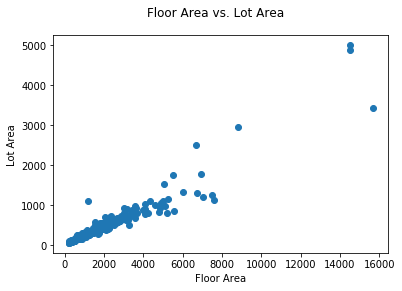

In [451]:
plt.scatter(df["floor_area"], df["lot_area"])
plt.suptitle("Floor Area vs. Lot Area")
plt.xlabel("Floor Area")
plt.ylabel("Lot Area")

#### Should Estimate price or adjusted estimate price be used?
Below is a histogram of the year of completion for these buildings. As it is temporal data, I will not be using this as a predictive variable. However, I wanted to see the distribution of Completion year to see if there is a concern of the money value and wheather final prices should be adjusted. 

Text(0.5, 0.98, 'Distribution of Completion Year')

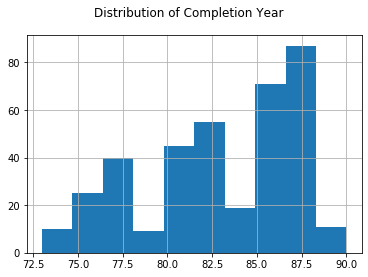

In [452]:
df["compl_yr"].hist()
plt.suptitle("Distribution of Completion Year")

We can see that the range of years is around 20 years. My first instinct was that this is not long enough of a time span to where the value of money changes significantly. However, I wanted to look further into this and decided to plot the estimated price of construction and the estimated price adusted to a base year (both of which are provided in the dataset). 

Text(0.5, 0.98, 'Estimated Construction cost vs. Estimated Construction cost adjusted to base year')

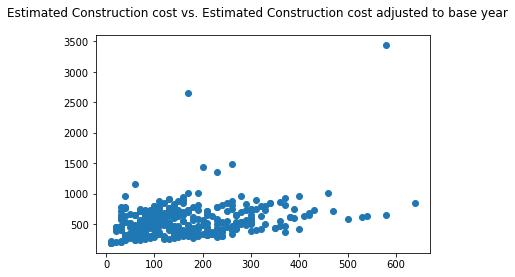

In [453]:
plt.scatter(df["estimate_price"], df["estimate_price_adj"]) 
plt.suptitle("Estimated Construction cost vs. Estimated Construction cost adjusted to base year")

We can see that the relationship between these two variables are not linear, meaning that we have to be strategic about which variable to choose. 
There seems to be much more variability in the cost adjusted to base year. 

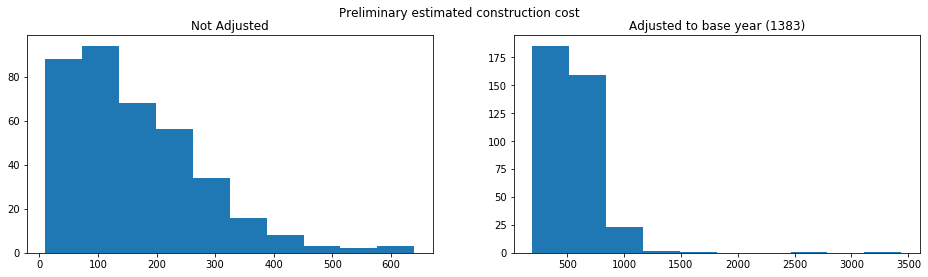

In [454]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 4)
fig.suptitle('Preliminary estimated construction cost')
ax1.hist(df["estimate_price"])
ax1.title.set_text('Not Adjusted')
ax2.hist(df["estimate_price_adj"])
ax2.title.set_text('Adjusted to base year (1383)')

By plotting both of these variables separately in histograms, it is evident that the adjusted version has much more variability and several values that could be classified as outliers. Because the dataset provided the Actual construction cost, I wanted to see how each related to the final cost and whether there would be a visible relationship. 

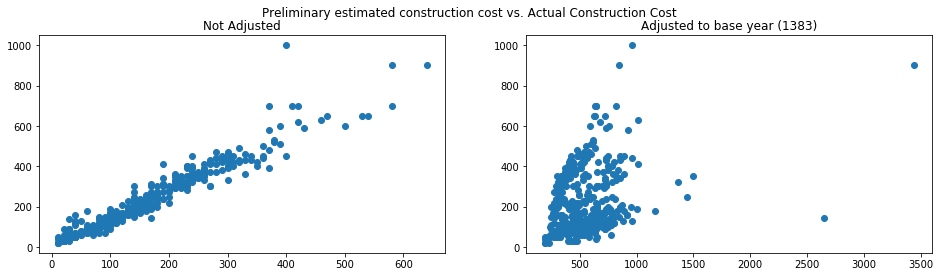

In [455]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 4)
fig.suptitle('Preliminary estimated construction cost vs. Actual Construction Cost ')
ax1.scatter(df["estimate_price"], df1["V-10"])
ax1.title.set_text('Not Adjusted')
ax2.scatter(df["estimate_price_adj"], df1["V-10"])
ax2.title.set_text('Adjusted to base year (1383)')

From this, we can clearly see that the non-adjusted estimated construction cost is more closely related to the actual final construction cost. Although this may be because the final construction cost is not adjusted to the base year, this leads me to believe that the non-adjusted estimated prices are a much better indicator or predictor of the final price of the property. 

## Univariate Regression
As I will be creating multiple different univariate regression models, I decided to make a method to eliminate repeated code. This univ_reg method takes in the predictive column name and returns a list including [w[0], w[1], mtrain_rmse, mtest_rmse]

In [456]:
# 80% training data
cross_val_split = 0.8

def univ_reg(input):
    X = np.array(df[input]).reshape(len(df), 1)
    Y = np.array(df["final_price"]).reshape(len(X), 1)
    ones = np.array([1]*len(X)).reshape(len(X), 1)
    A = np.append(ones, X, axis = 1)
    A = np.append(A, Y, axis = 1)

    # shuffle and split
    np.random.shuffle(A)
    train_split = int(len(A)*cross_val_split)
    m_train = A[:train_split]
    m_test = A[train_split:]

    # linear regression
    m_A = m_train[:,:2]
    m_Y = m_train[:, 2]
    w = np.linalg.lstsq(m_A, m_Y, rcond=None)[0]
    print("final_price = " + str(w[0])+ " + " + str(w[1])+ " * " + str(input) )

    # M2_train
    mtrain_yhat = m_train[:,1]*w[1]+w[0]
    mtrain_sse = np.sum((m_train[:,2] - mtrain_yhat)**2)
    mtrain_mse = mtrain_sse / len(m_train)
    mtrain_rmse = np.sqrt(mtrain_mse)

    # M2_test
    mtest_yhat = m_test[:,1]*w[1]+w[0]
    mtest_sse = np.sum((m_test[:, 2] - mtest_yhat)**2)
    mtest_mse = mtest_sse / len(m_test)
    mtest_rmse = np.sqrt(mtest_mse) 

#     print("RMSE Train: " + str(mtrain_rmse))
#     print("RMSE Test: " + str(mtest_rmse))
    
    return [w[0], w[1], mtrain_rmse, mtest_rmse]

Running linear regression on every variable that we are interested in by applying it to the method above. 

In [457]:
df.columns.to_list()[1:-1]
col_names = ['w[0]', 'w[1]', 'train_rmse', 'test_rmse']
univ_results = pd.DataFrame(columns = col_names)
univ_results

for i in df.columns.to_list()[1:-1]:
    univ_results.loc[i] = pd.Series(univ_reg(i), index = col_names)

univ_results


final_price = 1084.9458870571077 + 0.16785240500596252 * floor_area
final_price = 1237.0338629794817 + 0.32328414045850223 * lot_area
final_price = 3.774100411146372 + 8.694173050390443 * estimate_price
final_price = 956.1886428166473 + 0.8801125305856853 * estimate_price_adj
final_price = 113.88901499099282 + 1.1642065287873546 * orig_price


,w[0],w[1],train_rmse,test_rmse
floor_area,1084.945887,0.167852,1175.236178,1123.166171
lot_area,1237.033863,0.323284,1164.523949,1281.080540
estimate_price,3.774100,8.694173,762.232810,686.983914
estimate_price_adj,956.188643,0.880113,1242.537774,912.481457
orig_price,113.889015,1.164207,268.543934,226.907694


### Bivariate Regression
I did the same for bivariate regression, creating a method that creates a lin regression model from passing 2 variable names.

In [492]:
# 80% training data
cross_val_split = 0.8

def bivar_reg(var1, var2):
    X = np.array(df[[var1, var2]]).reshape(len(df), 2)
    Y = np.array(df["final_price"]).reshape(len(X), 1)
    ones = np.array([1]*len(X)).reshape(len(X), 1)
    A = np.append(ones, X, axis = 1)
    A = np.append(A, Y, axis = 1)

    # shuffle and split
    np.random.shuffle(A)
    train_split = int(len(A)*cross_val_split)
    m_train = A[:train_split]
    m_test = A[train_split:]

    # linear regression
    m_A = m_train[:,:3]
    m_Y = m_train[:, 3]
    w = np.linalg.lstsq(m_A, m_Y, rcond=None)[0]
    

    # M2_train
    mtrain_yhat = m_train[:,2]*w[2]+m_train[:,1]*w[1]+w[0]
    mtrain_sse = np.sum((m_train[:,3] - mtrain_yhat)**2)
    mtrain_mse = mtrain_sse / len(m_train)
    mtrain_rmse = np.sqrt(mtrain_mse)

    # M2_test
    mtest_yhat = m_test[:,2]*w[2]+m_test[:,1]*w[1]+w[0]
    mtest_sse = np.sum((m_test[:,3] - mtest_yhat)**2)
    mtest_mse = mtest_sse / len(m_test)
    mtest_rmse = np.sqrt(mtest_mse)
    
    eqtn = ("final_price = " + str(w[0]) + " + " + str(w[1]) + " * " + str(var1) + " " + " + " + str(w[2]) + " * " + str(var2))
    rmse_train = ("RMSE Train: " + str(mtrain_rmse))
    rmse_test = ("RMSE Test: " + str(mtest_rmse))
    
    return eqtn + "\n" + rmse_train  + "\n" + rmse_test


### Bivariate Regression: Original Price, Estimated Price

In [493]:
og_est = bivar_reg("orig_price", "estimate_price")
print(og_est)

final_price = 110.39612936960104 + 1.2465710428781014 * orig_price  + -0.41801953020942473 * estimate_price
RMSE Train: 249.20763577719245
RMSE Test: 301.8406675831026


### Bivariate Regression: Original Price, Lot Area

In [494]:
og_lot = bivar_reg("orig_price", "lot_area")
print(og_lot)

final_price = 99.42349437655363 + 1.181494030541359 * orig_price  + 0.0052558840411756624 * lot_area
RMSE Train: 232.1710909896325
RMSE Test: 348.52391052160925


## Results
5 Univariate regression models were created. 

final_price = 1084.9458870571077 + 0.16785240500596252 * floor_area
Training RMSE: 1175.236177874621
Testing RMSE: 1123.1661709669902


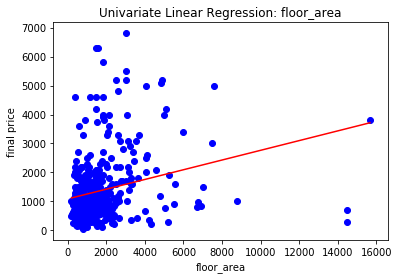

final_price = 1237.0338629794817 + 0.32328414045850223 * lot_area
Training RMSE: 1164.5239486831867
Testing RMSE: 1281.0805398923997


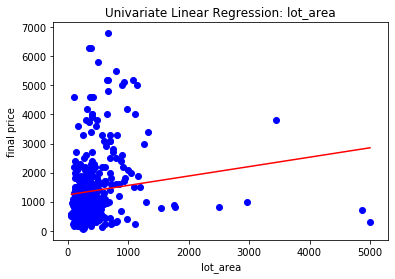

final_price = 3.774100411146372 + 8.694173050390443 * estimate_price
Training RMSE: 762.2328103240197
Testing RMSE: 686.9839139259333


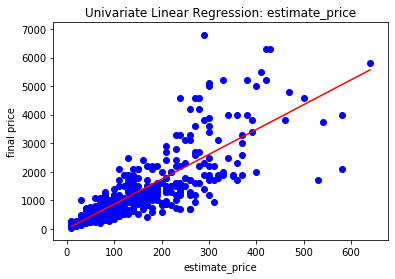

final_price = 956.1886428166473 + 0.8801125305856853 * estimate_price_adj
Training RMSE: 1242.5377743729996
Testing RMSE: 912.4814568623812


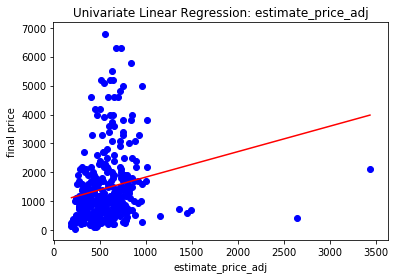

final_price = 113.88901499099282 + 1.1642065287873546 * orig_price
Training RMSE: 268.54393394203345
Testing RMSE: 226.90769436236903


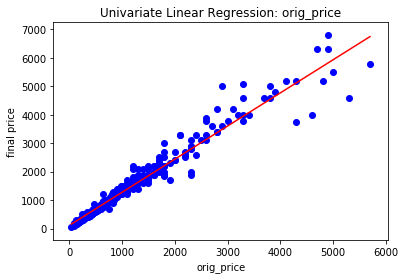

In [495]:
i = "floor_area"

for i in df.columns.to_list()[1:-1]:
    x = np.linspace(df[i].min(),df[i].max(),100)
    y = x*univ_results["w[1]"][i]+univ_results["w[0]"][i]
    plt.plot(x, y, '-r', label='y=2x+1')
    plt.scatter(df[i], df["final_price"], color = "blue")
    plt.title("Univariate Linear Regression: " + i)
    plt.xlabel(i)
    plt.ylabel("final price")
    print("final_price = " + str(univ_results["w[0]"][i])+ " + " + str(univ_results["w[1]"][i])+ " * " + i)
    print("Training RMSE: " + str(univ_results["train_rmse"][i]))
    print("Testing RMSE: " + str(univ_results["test_rmse"][i]))
    plt.show()

A summary of the five Univariate models

In [462]:
univ_results

,w[0],w[1],train_rmse,test_rmse
floor_area,1084.945887,0.167852,1175.236178,1123.166171
lot_area,1237.033863,0.323284,1164.523949,1281.080540
estimate_price,3.774100,8.694173,762.232810,686.983914
estimate_price_adj,956.188643,0.880113,1242.537774,912.481457
orig_price,113.889015,1.164207,268.543934,226.907694


From this, two bivariate linear models were created

#### Bivariate Model: Original price & Estimate Price 

In [496]:
print(og_est)

final_price = 110.39612936960104 + 1.2465710428781014 * orig_price  + -0.41801953020942473 * estimate_price
RMSE Train: 249.20763577719245
RMSE Test: 301.8406675831026


#### Bivariate Model: Original Price & Lot Area 

In [497]:
print(og_lot)

final_price = 99.42349437655363 + 1.181494030541359 * orig_price  + 0.0052558840411756624 * lot_area
RMSE Train: 232.1710909896325
RMSE Test: 348.52391052160925


From the Univariate linear regression models, we can see that the original price of the property before construction is the variable that is the most predictive of the final sale price. This is evident from the low RMSE value in both the training (269.746471) and testing data (219.027607). The RMSE for the training and testing data are relatively similar with the one for the training data being slightly higher. This also indicates that this model is appropriate to the data. 

When comparing the models with floor area and lot area, we can see that the floor area is more predictive of the final price than lot area. However, there is a large gap between the training and testing data for both of these models, which is an indicator that a linear model may not have been the best way to represent this relationship. Cross validation chooses a random group of points to train the model on. Then the model is evaluated on both the training dataset and the testing dataset. Therefore, if the evaluation varies greatly, it is an indication that depending on which random group of variables are chosen initially, the model will change and thus, is not the best representation of the data. 

Estimated price seems to be the second best indicator of the final sales price, with a training RMSE of 747.968952 and a testing RMSE of 739.622042. As these values are very close, it seems as though the relationship between estimated construction price and final sale price of the property does have a linear relationship and is a strong predictor. Creating the univariate models also confirmed what we saw in the EDA, that estimate price is a must stronger indicator rather than adjusted estimate price. This is most likely because the final price is not adjusted to a base year and not adjusting the data may be incorporating information related to temporal, economic, or construction trends. 

I created bivariate models only with original price, I wanted to see whether adding variables would increase the model performance. This is why I decided to only create models with lot_area and estimate_price, as these were the two variables that performed the second and third best. However, from the performance of the two models above, we can see that this is not the case. Adding the variables only increased the testing RMSE and the difference between the training and testing dataset is also an indication that this model is not well suited for this data. I also think that it is quite interesting that even though the lot_are and estimate_price performed quite differently in their own univariate models, when added to a bivariate model with the original price, they performed similarly. 

## Discussion 
In conclusion, the original price of a property before construction is the best indicator of the price that that same property will go for sale after construction. Considering factors such as the floor size of the building or the estimated construction cost, does not improve the performance of the model. 

For future work, it would be interesting to test out different types of models on the variables where it seemed as though linear regression was not the most appropriate model. If we were given more information on the invididual data points, it would have also been a possibility to exclude outliers and see if there were a certain group or type of building that seemed to follow a different pattern, skewing results. Another possible study would be to first perform clustering based on location or construction type, and perform linear regression on the individual clusters. 

### Works Cited
https://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc#

https://www.yourownarchitect.com/what-is-the-difference-between-floor-area-and-lot-area/#:~:text=A%20lot%20area%20is%20the,and%20including%20the%20exterior%20walls.